In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

/home/vturino/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


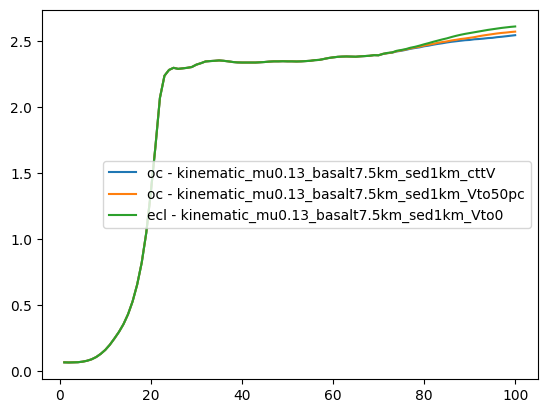

In [12]:
models = ["kinematic_mu0.13_basalt7.5km_sed1km_cttV", "kinematic_mu0.13_basalt7.5km_sed1km_Vto50pc", "kinematic_mu0.13_basalt7.5km_sed1km_Vto0"]

for m, mod in enumerate(models):
    where = f"/home/vturino/PhD/projects/exhumation/plots/single_models/{mod}/txt_files/PT/"
    p = pd.read_csv(f"{where}pt_part_34205.txt", sep = "\s+")
    if p["ecl"].iloc[-1] == 1:
        lith = "ecl"
    if p["oc"].iloc[-1] == 1:
        lith = "oc"
    
    plt.plot(p["time"], p["Plith"], label = f"{lith} - {mod}")
    plt.legend()

In [9]:
p

,id,time,x,y,P,Plith,T,depth,vx,vy,oc,sed,opc,ecl
0,3786966,1,2375280,898830,0.017,0.066,20.118,898.830,1.087,0.010,1,0,0,0
1,3786966,2,2380822,898848,0.017,0.065,19.508,898.848,1.100,0.001,1,0,0,0
2,3786966,3,2386442,898844,0.016,0.066,19.522,898.844,1.146,-0.001,1,0,0,0
3,3786966,4,2392226,898796,0.016,0.067,20.165,898.796,1.167,-0.026,1,0,0,0
4,3786966,5,2398162,898670,0.016,0.071,21.849,898.670,1.217,-0.045,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3786966,96,2303687,815734,2.797,2.593,426.053,815.734,-0.039,-0.031,1,0,0,0
96,3786966,97,2303489,815582,2.716,2.598,428.728,815.582,-0.039,-0.030,1,0,0,0
97,3786966,98,2303285,815444,2.706,2.602,431.392,815.443,-0.041,-0.027,0,0,0,1
98,3786966,99,2303087,815309,2.595,2.606,434.079,815.309,-0.038,-0.026,0,0,0,1
